In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("requests.csv")

In [3]:
TARGET = "is_fraudulent"

In [4]:
df.head()

,operating_system,browser,currency_code,ip_address,cpu_cores,chipset,session_duration_seconds,chipset_manufacturer,clicks,suspicious_flags,friends_count,purchases_successful,accept_cookies,is_fraudulent
0,Windows,NaN,USD,164.29.94.215,9 cpus,Intel Core i9-11900K,245.0,Intel,3-6,0,625.0,0.0,Yes,True
1,Linux,Firefox,EUR,212.114.74.220,8 cpus,Apple M2,NaN,Apple,2-7,1,157.0,0.0,Yes,True
2,Android,Brave,CHF,11.75.142.182,8 cpus,Apple M2,65.0,Apple,NaN,0,137.0,NaN,Yes,False
3,Windows,Firefox,JPY,51.49.204.153,6 cpus,Apple M2,75.0,NaN,3-8,2,841.0,0.0,Yes,True
4,Android,Opera,CHF,222.93.239.161,7 cpus,AMD Ryzen 7 5800X,148.0,AMD,NaN,0,118.0,NaN,NaN,False


In [5]:
df.isna().sum()

operating_system            30
browser                     37
currency_code               32
ip_address                  40
cpu_cores                   31
chipset                      0
session_duration_seconds    60
chipset_manufacturer        30
clicks                      33
suspicious_flags             0
friends_count               40
purchases_successful        40
accept_cookies              14
is_fraudulent               10
dtype: int64

In [6]:
len(df)

195

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   operating_system          165 non-null    object 
 1   browser                   158 non-null    object 
 2   currency_code             163 non-null    object 
 3   ip_address                155 non-null    object 
 4   cpu_cores                 164 non-null    object 
 5   chipset                   195 non-null    object 
 6   session_duration_seconds  135 non-null    float64
 7   chipset_manufacturer      165 non-null    object 
 8   clicks                    162 non-null    object 
 9   suspicious_flags          195 non-null    int64  
 10  friends_count             155 non-null    float64
 11  purchases_successful      155 non-null    float64
 12  accept_cookies            181 non-null    object 
 13  is_fraudulent             185 non-null    object 
dtypes: float64

In [8]:
len(df["ip_address"].unique())

156

In [9]:
len(df)

195

In [10]:
df = df.drop(columns=["ip_address"])

In [11]:
df[TARGET].unique()

array([True, False, nan], dtype=object)

In [12]:
df = df.dropna(subset=[TARGET], axis=0)

In [13]:
df.isna().sum()

operating_system            29
browser                     34
currency_code               31
cpu_cores                   31
chipset                      0
session_duration_seconds    56
chipset_manufacturer        29
clicks                      29
suspicious_flags             0
friends_count               39
purchases_successful        39
accept_cookies              14
is_fraudulent                0
dtype: int64

In [14]:
keys = df.keys()
for key in df.keys():
    print(f"{key} - {len(df[key].unique())}")

operating_system - 6
browser - 7
currency_code - 5
cpu_cores - 9
chipset - 11
session_duration_seconds - 93
chipset_manufacturer - 5
clicks - 30
suspicious_flags - 3
friends_count - 120
purchases_successful - 4
accept_cookies - 3
is_fraudulent - 2


In [15]:
df = df.drop(columns=["friends_count"])

In [16]:
def preprocess_clicks(x):
    if not pd.isna(x):
        min_,max_ = x.split('-')
        return (int(min_) + int(max_)) / 2
df["clicks"] = df["clicks"].apply(preprocess_clicks)

In [17]:
df["clicks"].unique()

array([ 4.5,  nan,  5.5,  6. , 10.5,  7. , 10. ,  8. ,  5. ,  7.5,  2.5,
        3. , 11.5,  4. ,  2. ,  3.5,  8.5,  6.5,  9. ])

In [18]:
df["clicks"].max() - df["clicks"].min()

np.float64(9.5)

In [19]:
df.isna().sum()

operating_system            29
browser                     34
currency_code               31
cpu_cores                   31
chipset                      0
session_duration_seconds    56
chipset_manufacturer        29
clicks                      29
suspicious_flags             0
purchases_successful        39
accept_cookies              14
is_fraudulent                0
dtype: int64

<Axes: >

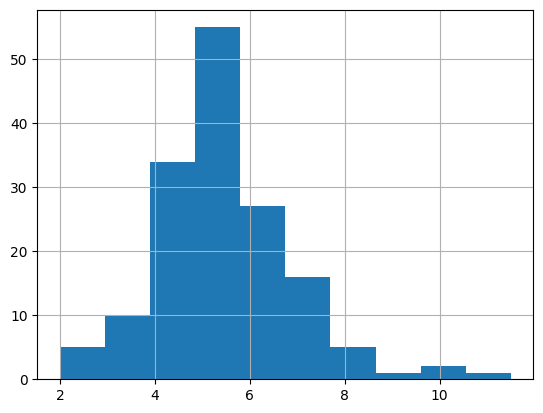

In [20]:
df["clicks"].hist()

<Axes: >

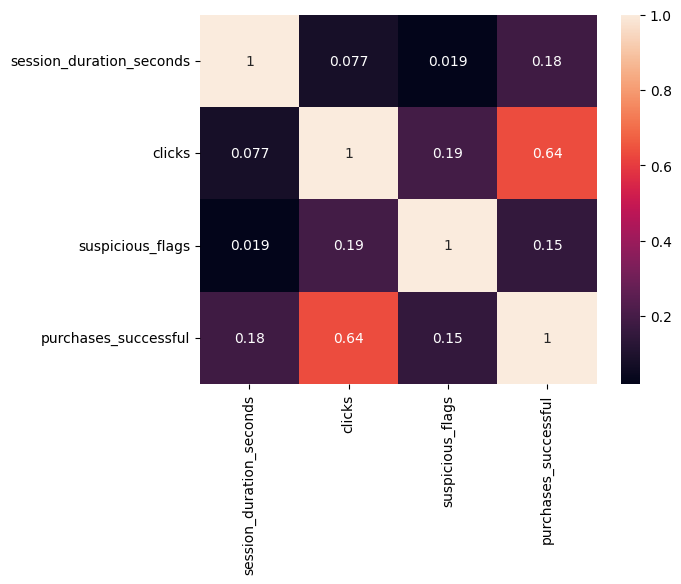

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [22]:
df['purchases_successful'].isna().sum()

np.int64(39)

In [23]:
df['purchases_successful'].unique()

array([ 0., nan,  2.,  1.])

In [24]:
iterative_imputer = IterativeImputer()
imputed_data = iterative_imputer.fit_transform(df[["purchases_successful", "clicks"]])
df[["purchases_successful", "clicks"]] = imputed_data


In [25]:
df.isna().sum()

operating_system            29
browser                     34
currency_code               31
cpu_cores                   31
chipset                      0
session_duration_seconds    56
chipset_manufacturer        29
clicks                       0
suspicious_flags             0
purchases_successful         0
accept_cookies              14
is_fraudulent                0
dtype: int64

In [26]:
df.head()

,operating_system,browser,currency_code,cpu_cores,chipset,session_duration_seconds,chipset_manufacturer,clicks,suspicious_flags,purchases_successful,accept_cookies,is_fraudulent
0,Windows,NaN,USD,9 cpus,Intel Core i9-11900K,245.0,Intel,4.500000,0,0.000000,Yes,True
1,Linux,Firefox,EUR,8 cpus,Apple M2,NaN,Apple,4.500000,1,0.000000,Yes,True
2,Android,Brave,CHF,8 cpus,Apple M2,65.0,Apple,5.410494,0,0.110142,Yes,False
3,Windows,Firefox,JPY,6 cpus,Apple M2,75.0,NaN,5.500000,2,0.000000,Yes,True
4,Android,Opera,CHF,7 cpus,AMD Ryzen 7 5800X,148.0,AMD,5.410494,0,0.110142,NaN,False


In [27]:
df["chipset"].unique()

array(['Intel Core i9-11900K', 'Apple M2', 'AMD Ryzen 7 5800X',
       'Intel Core i5-8250U', 'Intel Core i7-9750H',
       'Qualcomm Snapdragon 865', 'Intel Core i3-8100',
       'AMD Ryzen 3 3200G', 'Apple M1', 'AMD Ryzen 5 3600',
       'Qualcomm Snapdragon 888'], dtype=object)

In [28]:
chipset_list = df["chipset"]
chipset_manufacturer_list = df["chipset_manufacturer"]
imputed_man = []
for cpu, man in zip(chipset_list, chipset_manufacturer_list):
    imputed_man.append(cpu.split()[0])
imputed_man[:5]

['Intel', 'Apple', 'Apple', 'Apple', 'AMD']

In [29]:
df["chipset_manufacturer"] = imputed_man
df.drop(columns=["chipset"], inplace=True)

In [30]:
df.isna().sum()

operating_system            29
browser                     34
currency_code               31
cpu_cores                   31
session_duration_seconds    56
chipset_manufacturer         0
clicks                       0
suspicious_flags             0
purchases_successful         0
accept_cookies              14
is_fraudulent                0
dtype: int64

In [31]:
df["chipset_manufacturer"].unique()

array(['Intel', 'Apple', 'AMD', 'Qualcomm'], dtype=object)

In [32]:
keys = df.keys()
for key in df.keys():
    print(f"{key} - {len(df[key].unique())}")

operating_system - 6
browser - 7
currency_code - 5
cpu_cores - 9
session_duration_seconds - 93
chipset_manufacturer - 4
clicks - 21
suspicious_flags - 3
purchases_successful - 17
accept_cookies - 3
is_fraudulent - 2


In [33]:
df.isna().sum()

operating_system            29
browser                     34
currency_code               31
cpu_cores                   31
session_duration_seconds    56
chipset_manufacturer         0
clicks                       0
suspicious_flags             0
purchases_successful         0
accept_cookies              14
is_fraudulent                0
dtype: int64

In [34]:
df['accept_cookies'].value_counts()

accept_cookies
Yes    132
No      39
Name: count, dtype: int64

In [35]:
def fun(x):
    if not pd.isna(x):
        if x == "Yes": return 1
        else: return 0
df["accept_cookies"] = df["accept_cookies"].apply(fun)
df["accept_cookies"].unique()

array([ 1., nan,  0.])

In [36]:
constant_imputer = SimpleImputer(strategy="constant", fill_value=1)
df["accept_cookies"] = constant_imputer.fit_transform([df["accept_cookies"]])[0]
df["accept_cookies"].unique()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/impute/_base.py:590: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


array([1., 0.])

In [37]:
df.isna().sum()

operating_system            29
browser                     34
currency_code               31
cpu_cores                   31
session_duration_seconds    56
chipset_manufacturer         0
clicks                       0
suspicious_flags             0
purchases_successful         0
accept_cookies               0
is_fraudulent                0
dtype: int64

In [38]:
df["cpu_cores"]

0      9 cpus
1      8 cpus
2      8 cpus
3      6 cpus
4      7 cpus
        ...  
190    8 cpus
191    9 cpus
192       NaN
193       NaN
194    8 cpus
Name: cpu_cores, Length: 185, dtype: object

In [39]:
def a(x):
    if not pd.isna(x):
        return int(x[0])
df["cpu_cores"] = df["cpu_cores"].apply(a)

In [40]:
constant_imputer = SimpleImputer(strategy="median")
df[["cpu_cores"]] = constant_imputer.fit_transform(df[["cpu_cores"]])
df["cpu_cores"].unique()

array([9., 8., 6., 7., 5., 1., 4.])

In [41]:
df.isna().sum()

operating_system            29
browser                     34
currency_code               31
cpu_cores                    0
session_duration_seconds    56
chipset_manufacturer         0
clicks                       0
suspicious_flags             0
purchases_successful         0
accept_cookies               0
is_fraudulent                0
dtype: int64

In [42]:
df = df.drop(columns=["currency_code"])

In [43]:
df = df.drop(columns=["session_duration_seconds"])

In [44]:
constant_imputer = SimpleImputer(strategy="most_frequent")
df[["browser"]] = constant_imputer.fit_transform(df[["browser"]])
df["browser"].unique()

array(['Chrome', 'Firefox', 'Brave', 'Opera', 'Safari', 'Edge'],
      dtype=object)

In [45]:
constant_imputer = SimpleImputer(strategy="most_frequent")
df[["operating_system"]] = constant_imputer.fit_transform(df[["operating_system"]])
df["operating_system"].unique()

array(['Windows', 'Linux', 'Android', 'iOS', 'macOS'], dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   operating_system      185 non-null    object 
 1   browser               185 non-null    object 
 2   cpu_cores             185 non-null    float64
 3   chipset_manufacturer  185 non-null    object 
 4   clicks                185 non-null    float64
 5   suspicious_flags      185 non-null    int64  
 6   purchases_successful  185 non-null    float64
 7   accept_cookies        185 non-null    float64
 8   is_fraudulent         185 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 14.5+ KB


In [47]:
df.head()

,operating_system,browser,cpu_cores,chipset_manufacturer,clicks,suspicious_flags,purchases_successful,accept_cookies,is_fraudulent
0,Windows,Chrome,9.0,Intel,4.500000,0,0.000000,1.0,True
1,Linux,Firefox,8.0,Apple,4.500000,1,0.000000,1.0,True
2,Android,Brave,8.0,Apple,5.410494,0,0.110142,1.0,False
3,Windows,Firefox,6.0,Apple,5.500000,2,0.000000,1.0,True
4,Android,Opera,7.0,AMD,5.410494,0,0.110142,1.0,False


In [48]:
ordinal_encoder = OrdinalEncoder(categories="auto")
encoded_values = ordinal_encoder.fit_transform(df[["operating_system"]])
df["operating_system"] = encoded_values

In [49]:
ordinal_encoder = OrdinalEncoder(categories="auto")
encoded_values = ordinal_encoder.fit_transform(df[["browser"]])
df["browser"] = encoded_values

In [50]:
ordinal_encoder = OrdinalEncoder(categories="auto")
encoded_values = ordinal_encoder.fit_transform(df[["chipset_manufacturer"]])
df["chipset_manufacturer"] = encoded_values

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   operating_system      185 non-null    float64
 1   browser               185 non-null    float64
 2   cpu_cores             185 non-null    float64
 3   chipset_manufacturer  185 non-null    float64
 4   clicks                185 non-null    float64
 5   suspicious_flags      185 non-null    int64  
 6   purchases_successful  185 non-null    float64
 7   accept_cookies        185 non-null    float64
 8   is_fraudulent         185 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 14.5+ KB


In [52]:
def fun(x):
    if x is True: return 1
    else: return 0
df[TARGET] = df[TARGET].apply(fun)        

In [53]:
df[TARGET].unique()

array([1, 0])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   operating_system      185 non-null    float64
 1   browser               185 non-null    float64
 2   cpu_cores             185 non-null    float64
 3   chipset_manufacturer  185 non-null    float64
 4   clicks                185 non-null    float64
 5   suspicious_flags      185 non-null    int64  
 6   purchases_successful  185 non-null    float64
 7   accept_cookies        185 non-null    float64
 8   is_fraudulent         185 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.5 KB


In [55]:
df.head()

,operating_system,browser,cpu_cores,chipset_manufacturer,clicks,suspicious_flags,purchases_successful,accept_cookies,is_fraudulent
0,2.0,1.0,9.0,2.0,4.500000,0,0.000000,1.0,1
1,1.0,3.0,8.0,1.0,4.500000,1,0.000000,1.0,1
2,0.0,0.0,8.0,1.0,5.410494,0,0.110142,1.0,0
3,2.0,3.0,6.0,1.0,5.500000,2,0.000000,1.0,1
4,0.0,4.0,7.0,0.0,5.410494,0,0.110142,1.0,0


In [56]:
df['is_fraudulent'].value_counts()

is_fraudulent
0    140
1     45
Name: count, dtype: int64

In [57]:
df['is_fraudulent']

0      1
1      1
2      0
3      1
4      0
      ..
190    1
191    1
192    0
193    0
194    0
Name: is_fraudulent, Length: 185, dtype: int64

In [58]:
X, y = df.drop(columns=[TARGET]), df[TARGET]

In [59]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(train_X, train_y)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
pred_y = model.predict(test_X)

In [64]:
print(f"Accuracy: {accuracy_score(test_y, pred_y)}")
print(f"Precision: {precision_score(test_y, pred_y)}")
print(f"Recall: {recall_score(test_y, pred_y)}")
print(f"F1-Score: {f1_score(test_y, pred_y)}")

Accuracy: 0.6216216216216216
Precision: 0.16666666666666666
Recall: 0.1
F1-Score: 0.125


In [65]:
target0 = df[df[TARGET] == 0].sample(50)
target1 = df[df[TARGET] == 1]

In [ ]:
new_df = pd.concat([target0, target1], ignore_index=True)


In [75]:
df = new_df.sample(len(new_df))

In [76]:
X, y = df.drop(columns=[TARGET]), df[TARGET]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(train_X, train_y)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
pred_y = model.predict(test_X)

In [78]:
print(f"Accuracy: {accuracy_score(test_y, pred_y)}")
print(f"Precision: {precision_score(test_y, pred_y)}")
print(f"Recall: {recall_score(test_y, pred_y)}")
print(f"F1-Score: {f1_score(test_y, pred_y)}")

Accuracy: 0.631578947368421
Precision: 0.75
Recall: 0.5454545454545454
F1-Score: 0.631578947368421
